In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Simulieren von den Messungen mit Rausch
n = 500
m = 250
np.random.seed(2019)
x = np.random.rand(n)
A = np.random.rand(m,n)
b = A@x + 2.0*(np.random.rand(m)-0.5)

In [22]:
#Zielfuntion und Graident
def f(x):
    return 0.5*np.linalg.norm(A@x-b)**2

def grad(x):
    return A.T @ (A@x-b)

In [23]:
L     = np.linalg.norm(A.T@A)
sigma = 0.99/L
x0    = np.zeros(n)
eps   = 1e-3

In [24]:
#Gradientenverfahren
x      = x0
fWert1 = [f(x)]
k      = 0
while np.linalg.norm( grad(x) ) > eps:
    x = x - sigma*grad(x)
    fWert1.append(f(x))
    k += 1
k    

67195

In [25]:
#Nesterov-beschleunigung
x      = x0
x_alt  = x0
y      = x0
fWert2 = [f(x)]
k      = 0
while np.linalg.norm( grad(x) ) > eps:
    x = y - sigma*grad(y)
    y = x + (k-1)/(k+2)*(x-x_alt)
    x_alt = x
    fWert2.append(f(x))
    k += 1
k

14419

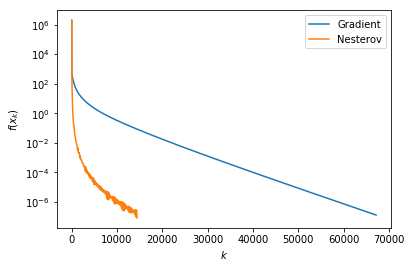

In [26]:
plt.semilogy(fWert1,label='Gradient')
plt.semilogy(fWert2,label='Nesterov')
plt.xlabel(r'$k$')
plt.ylabel(r'$f(x_k)$')
plt.legend()
plt.show()